# Statistical analysisa and examples

In [1]:
import sys
sys.path.append('../common')
from utils import weight3 as weight_fn, weight_by_index
from utils import bag_weight, score, mean_n_sigma, score_stats
from utils import MAX_WEIGHT, AVAILABLE_GIFTS, GIFT_TYPES, N_TYPES, N_BAGS

from copy import deepcopy
from collections import defaultdict

import numpy as np
np.random.seed(2017)
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [454]:
N_TRIALS = 5000
GIFT_WEIGHTS = np.zeros((N_TRIALS, N_TYPES))
for index in range(N_TYPES):
    GIFT_WEIGHTS[:, index] = [weight_by_index(index) for i in range(N_TRIALS)]

In [452]:
def compute_score(state):
    s = np.sum(GIFT_WEIGHTS * state, axis=1)
    mask = s < MAX_WEIGHT
    rejected = (N_TRIALS - np.sum(mask))*1.0 / N_TRIALS
    score = np.sum(s[mask]) * 1.0 / N_TRIALS
    return score, rejected

def another_score(bags):    
    gifts = np.sum(bags, axis=0)
    out = []
    for j in range(5):
        s = 0
        start = np.random.randint(GIFT_WEIGHTS.shape[0])
        for i, n in enumerate(gifts):  
            n = int(n)
            start = min(GIFT_WEIGHTS.shape[0]-n, start)
            weights = GIFT_WEIGHTS[start:start+n,i]
            weights[weights > MAX_WEIGHT] = 0.0
            s += np.sum(weights)
        out.append(s)
    return out

(29.034610663114478, 0.092100000000000001) (25.573990020697707, 0.20000000000000001)


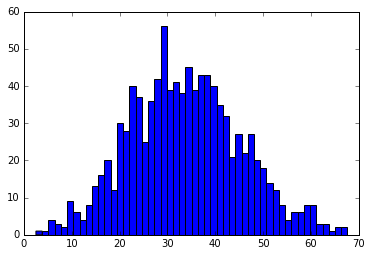

In [358]:
state = [0, 1, 0, 2, 0, 0, 0, 0, 1]
score((state,), return_rejected=True)
print compute_score(state), score((state,), return_rejected=True)
weights = np.array([bag_weight(state, n1=1) for i in range(1000)])
plt.figure()
hist = plt.hist(weights, bins=MAX_WEIGHT)

In [207]:
GIFT_TYPES

['ball', 'bike', 'blocks', 'book', 'coal', 'doll', 'gloves', 'horse', 'train']

In [359]:
custom_states = [
    [1, 0, 1, 1, 0, 1, 0, 1, 1],
#     [0, 2, 0, 0, 0, 0, 1, 0, 0],
#     [0, 0, 0, 0, 1, 0, 2, 0, 0],
#     [0, 1, 0, 0, 0, 0, 10, 0, 0],
#     [0, 1, 0, 0, 0, 0, 2, 0, 1]
#     [1, 0, 1, 1, 0, 1, 1, 1, 1], # 100
#     [1, 0, 1, 1, 0, 1, 2, 1, 1], # 100
    [1, 0, 1, 1, 0, 1, 3, 1, 1], # 33
]

# 34955
custom_states = [
    [2, 0, 1, 1, 0, 1, 0, 1, 1], # 550
    [0, 0, 1, 0, 0, 1, 2, 2, 1], # 100
    [0, 0, 1, 0, 0, 2, 0, 1, 1], # 500
    [0, 0, 2, 2, 0, 0, 0, 2, 0], # 500
    [0, 0, 2, 2, 0, 0, 0, 0, 1],
    [0, 1, 0, 2, 0, 0, 0, 0, 1],
]

custom_states = [
    [2, 0, 1, 1, 0, 1, 0, 1, 1], # 550
    [0, 0, 1, 0, 0, 1, 2, 2, 1], # 100
    [0, 0, 1, 0, 0, 2, 0, 1, 1], # 500
    
    [0, 0, 2, 2, 0, 0, 0, 2, 0], # 500
    [0, 0, 2, 2, 0, 0, 0, 0, 1],
    [0, 1, 0, 2, 0, 0, 0, 0, 1],

#     [0, 0, 1, 1, 0, 1, 0, 1, 1], # 1000
#     [0, 1, 0, 0, 0, 0, 2, 0, 1], # 100
#     [0, 2, 0, 0, 0, 0, 1, 0, 0], # 200
#     [0, 0, 0, 0, 1, 0, 2, 0, 0], # 100
#     [0, 0, 1, 1, 0, 1, 3, 1, 1], # 33
]

(35.551336446334297, 0.040599999999999997) (35.373635907922932, 0.040000000000000001)
(34.422736082403283, 0.094) (35.335671925286348, 0.070000000000000007)
(34.270873905466729, 0.045100000000000001) (34.454787971597071, 0.02)
(33.38032736824119, 0.073999999999999996) (35.77556130151482, 0.01)
(32.650355422955137, 0.087400000000000005) (37.028895870329755, 0.02)
(29.034610663114478, 0.092100000000000001) (27.898426091109073, 0.050000000000000003)


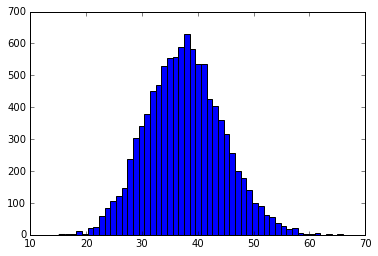

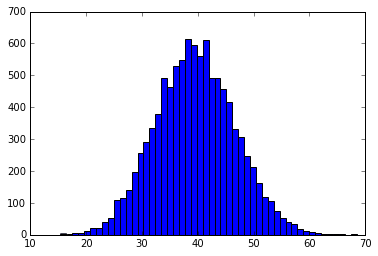

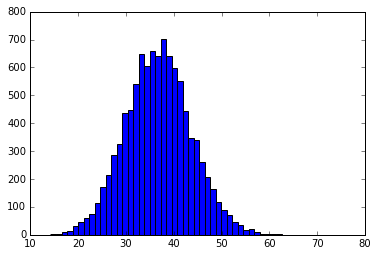

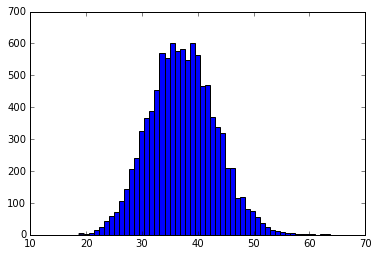

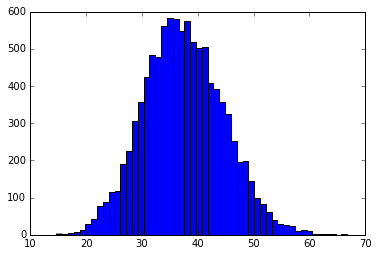

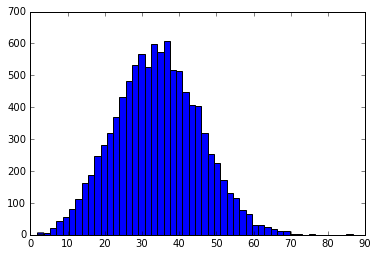

In [360]:
for state in custom_states:
    print compute_score(state), score((state,), return_rejected=True)
    weights = np.array([bag_weight(state, n1=1) for i in range(10000)])
    plt.figure()
    hist = plt.hist(weights, bins=MAX_WEIGHT)

In [344]:
# def check(filled_bags):
#     gifts = np.sum(filled_bags, axis=1)
#     for v, gift_type in zip(gifts, GIFT_TYPES):
#         assert AVAILABLE_GIFTS[gift_type] - v >= 0, "Total number of gifts: {}".format(gifts)

def update_available_gifts(available_gifts, filled_bags, gift_types=GIFT_TYPES):
    gifts = np.sum(filled_bags, axis=0)
    for v, gift_type in zip(gifts, gift_types):
        assert available_gifts[gift_type] - v >= 0, "Found state is not available : {}, {}, {}".format(gift_type, available_gifts[gift_type], v)
        available_gifts[gift_type] = available_gifts[gift_type] - v

In [361]:
filled_bags = np.zeros((N_BAGS, N_TYPES), dtype=np.uint8)

for i in range(550):
    filled_bags[i, :] = custom_states[0]

for i in range(550,650):
    filled_bags[i, :] = custom_states[1]

for i in range(650,825):
    filled_bags[i, :] = custom_states[2]

for i in range(825,862):
    filled_bags[i, :] = custom_states[3]

for i in range(862,912):
    filled_bags[i, :] = custom_states[4]

for i in range(912,1000):
    filled_bags[i, :] = custom_states[5]

    
available_gifts = deepcopy(AVAILABLE_GIFTS)
update_available_gifts(available_gifts, filled_bags)

In [364]:
print score(filled_bags, return_rejected=True), available_gifts

(34955.64611727895, 46.009999999999998) {'horse': 1.0, 'ball': 0.0, 'blocks': 1.0, 'doll': 0.0, 'train': 37.0, 'coal': 166.0, 'bike': 412.0, 'gloves': 0.0, 'book': 300.0}


In [463]:
another_score(filled_bags)

[0.0, 0.0, 0.0, 0.0, 0.0]

In [462]:
def another_score(bags):        
    out = []
    for j in range(5):
        s = 0
        for bag in bags:            
            start = np.random.randint(GIFT_WEIGHTS.shape[0])
            w = 0
            for i, v in enumerate(bag):
                if v > 0:
                    start = min(GIFT_WEIGHTS.shape[0]-n, start)
                    ws = GIFT_WEIGHTS[start:start+n,i]                    
                    w += np.sum(ws)
            s += w if w < MAX_WEIGHT else 0.0
        out.append(s)
    return out


In [363]:
for t in GIFT_TYPES:
    print t, available_gifts[t]

ball 0.0
bike 412.0
blocks 1.0
book 300.0
coal 166.0
doll 0.0
gloves 0.0
horse 1.0
train 37.0



550 [2, 0, 1, 1, 0, 1, 0, 1, 1] + 100 [0, 0, 1, 0, 0, 1, 2, 2, 1] + 175 [0, 0, 1, 0, 0, 2, 0, 1, 1] + 37 [0, 0, 2, 2, 0, 0, 0, 2, 0] + 54 [0, 0, 2, 2, 0, 0, 0, 0, 1] + 88 [0, 1, 0, 2, 0, 0, 0, 0, 1]
```
(34955.64611727895, 46.009999999999998) 
{'horse': 1.0, 'ball': 0.0, 'blocks': 1.0, 'doll': 0.0, 'train': 37.0, 'coal': 166.0, 'bike': 412.0, 'gloves': 0.0, 'book': 300.0}
```
Kaggle : 34994.02952

-----

All : [1, 0, 1, 1, 0, 1, 0, 1, 1]
```
(34574.634136662957, 21.390000000000001) 
{'horse': 0.0, 'ball': 100.0, 'blocks': 0.0, 'doll': 0.0, 'train': 0.0, 'coal': 166.0, 'bike': 500.0, 'gloves': 200.0, 'book': 200.0}
```

800 [1, 0, 1, 1, 0, 1, 0, 1, 1] + 200 [1, 0, 1, 1, 0, 1, 1, 1, 1]
```
(34691.551059590813, 24.48) {'horse': 0.0, 'ball': 100.0, 'blocks': 0.0, 'doll': 0.0, 'train': 0.0, 'coal': 166.0, 'bike': 500.0, 'gloves': 0.0, 'book': 200.0}
```

900 [1, 0, 1, 1, 0, 1, 0, 1, 1] + 100 [1, 0, 1, 1, 0, 1, 2, 1, 1]
```
(34614.065104952184, 25.449999999999999) {'horse': 0.0, 'ball': 100.0, 'blocks': 0.0, 'doll': 0.0, 'train': 0.0, 'coal': 166.0, 'bike': 500.0, 'gloves': 0.0, 'book': 200.0}
```

967 [1, 0, 1, 1, 0, 1, 0, 1, 1] + 33 [1, 0, 1, 1, 0, 1, 3, 1, 1]
```
(34634.079318323944, 24.199999999999999) {'horse': 0.0, 'ball': 100.0, 'blocks': 0.0, 'doll': 0.0, 'train': 0.0, 'coal': 166.0, 'bike': 500.0, 'gloves': 101.0, 'book': 200.0}
```

In [365]:
def to_submission(state, available_gifts, gift_types):
    n_gifts = [available_gifts[t] for t in gift_types]
    output = []
    for bag in state:
        o = []
        for index, count in enumerate(bag):   
            gift_type = gift_types[index]
            for i in range(count):
                v = n_gifts[index] - 1
                assert v >= 0, "Gift index is negative"
                o.append(gift_type + '_%i' % v)
                n_gifts[index] -= 1
        output.append(o)  
    return output

def write_submission(state, filename):
    with open(filename, 'w') as w:
        w.write("Gifts\n")
        for bag in state:
            w.write(' '.join(bag) + '\n')
    


In [366]:
from datetime import datetime
submission_file = '../results/submission_' + \
                  str(datetime.now().strftime("%Y-%m-%d-%H-%M")) + \
                  '.csv'  
        
submission = to_submission(filled_bags, AVAILABLE_GIFTS, GIFT_TYPES)    
write_submission(submission, submission_file)        

### Some results 

- submission_2017-01-29-13-59.csv
- random shuffle, s = 22
- Local : 33224.557601849941, 84.790000000000006
- Kaggle : 33534.45962
